# Chapter 2 - Multi-armed Bandits

In [1]:
from typing import Union

import matplotlib.pyplot as plt
import numpy as np

from environments import KArmedBandit
from utils import run_bandit_experiment

R_SEED = 9349

In [2]:
bandit = KArmedBandit(seed=R_SEED)

N_SAMPLES = 1000
rewards = np.zeros((N_SAMPLES, bandit.k))
for action in range(bandit.k):
    for sample in range(N_SAMPLES):
        reward = bandit.step(action)
        rewards[sample, action] = reward

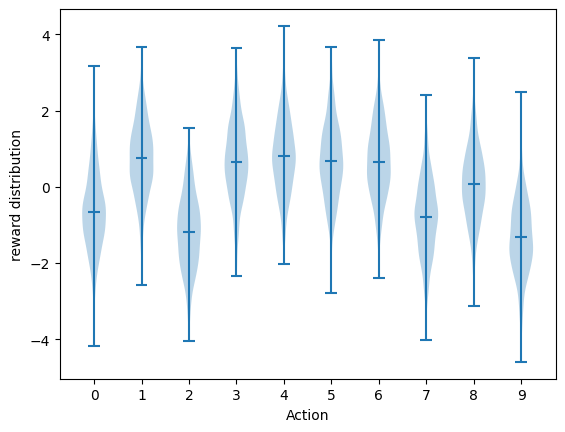

In [3]:
fig, ax = plt.subplots()
x_ticks = np.arange(0, bandit.k)

ax.violinplot(
    rewards,
    x_ticks,
    showmeans=True,
    showmedians=False,
    showextrema=True
)
ax.set_xlabel("Action")
ax.set_xticks(x_ticks)
ax.set_ylabel('reward distribution')
plt.show()

In [4]:
class ISAM:

    def __init__(
            self,
            k: int = 10,
            epsilon: float = 0.0,
            initial_value: float = 0.0,
            seed: Union[int, None] = None
    ):
        self.k = k
        self.epsilon = epsilon
        self.curr_estimate = np.full(self.k, initial_value)
        self.action_counts = np.zeros(self.k)
        self.rng = np.random.default_rng(seed)

    def get_action(self) -> int:
        if 1 - self.epsilon <= self.rng.random():
            return self.rng.integers(0, self.k - 1)

        return int(np.argmax(self.curr_estimate))

    def update_estimates(self, action: int, reward: float):
        self.action_counts[action] += 1
        self.curr_estimate[action] = (
                self.curr_estimate[action] + (1 / self.action_counts[action]) * (reward - self.curr_estimate[action])
        )

In [5]:
results = {}
for epsilon in [0, .01, .1]:
    results[f"ISAM(e={epsilon})"] = run_bandit_experiment(
        agent_class=ISAM,
        agent_args={"k": 10, "epsilon": epsilon},
        bandit_class=KArmedBandit,
        bandit_args={"k": 10},
        seed=R_SEED
    )

Start running experiment ISAM(k=10,epsilon=0)


100%|████████████████████████████████████████████████| 2000/2000 [00:16<00:00, 119.93it/s]


Start running experiment ISAM(k=10,epsilon=0.01)


100%|████████████████████████████████████████████████| 2000/2000 [00:16<00:00, 118.67it/s]


Start running experiment ISAM(k=10,epsilon=0.1)


100%|████████████████████████████████████████████████| 2000/2000 [00:17<00:00, 115.07it/s]


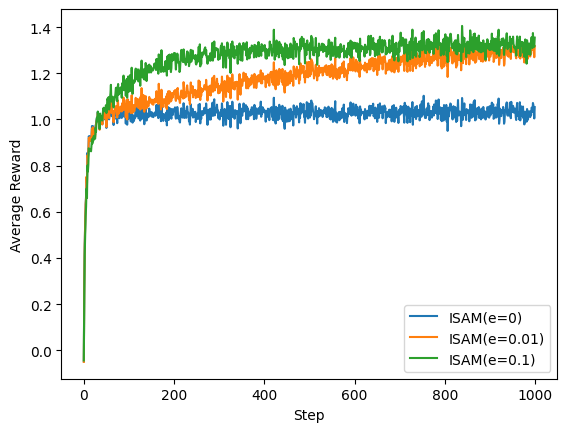

In [6]:
fig, ax = plt.subplots()

for label, rewards in results.items():
    ax.plot(rewards.mean(axis=0), label=label)

ax.legend(loc="best")
ax.set_ylabel("Average Reward")
ax.set_xlabel("Step")
plt.show()

![exercise 2.1](resources/ex2_1.png)

Since epsilon controls the degree of exploration, meaning with which probability the agent is going to pick a random action instead of the greedy one, this is obviously $1 - 0.5 = 0.5$.

![exercise 2.2](resources/ex2_2.png)

It may have occurred in time step 1 and 2, but this could also be the normal behavior of greedy algorithm. All actions have a value of 0 in the beginning so the algorithm might pick the first one, he then gets a reward of $-1$, so it takes the next greedy one which is action 2. However, this could also be the result of a random exploration. The same is true for time step 3. The $\epsilon$ case definitely occurred in time step 4 and 5. In time step 4 action 2 has a value of $-0.5$ whereas action 3 and 4 have a value of $0$. After time step 4, at time step 5 action 2 has a value of $0.3333$ and would be the greedy action, however, action 3 is selected at this time step with a value of $0$. Thus, the algorith is not behaving greedily in this time steps.

![exercise 2.3](resources/ex2_3.png)

The greedy ISAM performs worse amongst those three, it converges to an average reward of about 1 due to the lack of exploration. The ISAM with $\epsilon = 0.1$ performs better than the one with $\epsilon = 0.01$ in the beginning because of its higher rate of exploration, however, this behavior leads to worse performance in the long run compared to the ISAM with $\epsilon = 0.01$ because it will always take about $10%$ random actions, which impacts the performance. The ISAM with $\epsilon = 0.01$ would receive the highest average reward in the long run, because it would just take about $1%$ random actions. However, due to the small $\epsilon$, it explores its environment quit slow, which leads to a lower performance in the beginning.

Thus, ISAM($\epsilon = 0.01$) would take the optimal action in about $99%$ of the time and ISAM($\epsilon = 0.1$) in about $90%$ of the time if we would increase the steps towards a quite large number. Because the best possible average reward on this testbed is about $1.55$, that means we could expect a max average reward of about $1.53$ for the ISAM($\epsilon = 0.01$), about $1.40$ for the ISAM($\epsilon = 0.1$) and about $1.1$ for the greedy ISAM.

![exercise 2.4](resources/ex2_4.png)

![exercise 2.5](resources/ex2_5.png)

![exercise 2.6](resources/ex2_6.png)

![exercise 2.7](resources/ex2_7.png)

![exercise 2.8](resources/ex2_8.png)

![exercise 2.9](resources/ex2_9.png)

![exercise 2.10](resources/ex2_10.png)

![exercise 2.11](resources/ex2_11.png)